In [20]:
# include a custom stack data strucutre with push, pop, and peek methods
# this is a stack implementation of using array, where it can resize when it's full and shrink away when it's a quarter full
class Stack:
	def __init__(self,capacity=1):
		self.stack = [None]
		self.N = 0
		self.capacity = capacity
	
	def push(self, item):
		self.stack[self.N] = item
		self.N += 1
		if self.capacity == self.N or self.N <= self.capacity//4:		
			self.resize()
	
	def pop(self):
		item = self.stack[self.N-1]
		self.stack[self.N-1] = None
		self.N -= 1
		return item
	
	def isEmpty(self):
		return self.N == 0
	
    # resizing in this case is not used, as we assume the graph size is fixed
	def resize(self):
		# doubling the size
		#print(f"The current size and capacity are {self.N,self.capacity}, respectively.")
		if self.N == self.capacity:
			new_stack = 2*self.capacity*[None]
			for i in range(self.N):
				new_stack[i] = self.stack[i]
			self.stack = new_stack
			self.capacity = 2*self.capacity
		# halving the size
		elif self.N <= self.capacity//4:
			new_stack = self.capacity//2*[None]
			for i in range(self.N):
				new_stack[i] = self.stack[i]
			self.stack = new_stack
			self.capacity = self.capacity//2
		else:
			pass
			#print("Resizing is called for a suspicious reason.")
		#print(f"Afterwards, the size and capacity are {self.N,self.capacity}, respectively.")
		
	def display(self):
		print("Current stack content: ", end="")
		for i in range(self.N):
			if self.stack[i] is not None:
				print(self.stack[i], end=" ")	
	

tensor([[0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]], dtype=torch.int32)


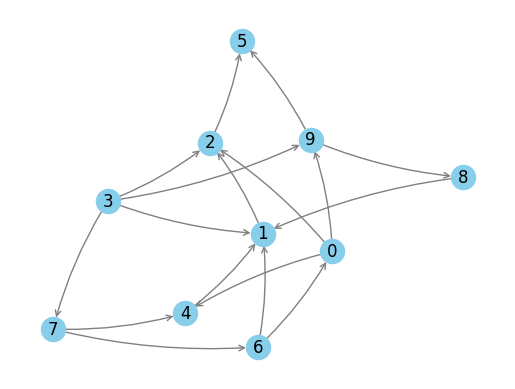

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 3 8


In [21]:
# first thing first, there should be a graph
import torch
from random import randint
n = 10
p = 0.2
g = (torch.rand(n, n) < p).int()
g.fill_diagonal_(0)   # remove self-loops (set diagonal to 0)
print(g)

import networkx as nx
import matplotlib.pyplot as plt

# assuming g is a torch int/bool adjacency matrix on CPU
# e.g. g = (torch.rand(n,n) < p).int()
A = g.cpu().numpy()        # convert to numpy
G = nx.DiGraph(A) # undirected; use create_using=nx.DiGraph() for directed

pos = nx.kamada_kawai_layout(G)  # layout (try nx.kamada_kawai_layout, nx.circular_layout, ...)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="skyblue")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(
    G, pos,
    arrowstyle="->",
    arrowsize=10,
    edge_color="gray",
    connectionstyle="arc3,rad=0.08",  # slight curve so arrows are visible
    arrows=True
)
plt.axis("off")
plt.show()

Q = set(range(n))
# randomly picking S and G

S = randint(0,n-1)
G = randint(0,n-1)
while G == S:
    G = randint(0,n-1)
# manually set S and G for consistent testing
'''
S = 0
G = 4
'''
print(Q, S, G)

In [23]:
# Now, we start to implement a procedural DPF using the above stack structure
# first, we include an expand

def successor(u):
    succ = set()
    for v in Q:
        if g[u][v] == 1:
            succ.add(v)
    return succ

DFS_stack = Stack(capacity=n)
DFS_stack.push(S)
visited = set()
predecessor = dict()
predecessor[S] = None

while not DFS_stack.isEmpty() and G not in visited:
    DFS_stack.display()
    current_node = DFS_stack.pop()
    if current_node not in visited:
        visited.add(current_node)
        print(f"Visiting node {current_node}")
        for neighbor in successor(current_node):
            if neighbor not in visited:
                DFS_stack.push(neighbor)
                predecessor[neighbor] = current_node


if G in visited:
    print(f"Goal node {G} found!")
    path = []
    node = G
    while node is not None:
        path.append(node)
        node = predecessor[node]
    path.reverse()
    print("Path:", path)
else:
    print(f"Goal node {G} not found in the graph.")

Current stack content: 3 Visiting node 3
Current stack content: 1 2 9 7 Visiting node 7
Current stack content: 1 2 9 4 6 Visiting node 6
Current stack content: 1 2 9 4 0 1 Visiting node 1
Current stack content: 1 2 9 4 0 2 Visiting node 2
Current stack content: 1 2 9 4 0 5 Visiting node 5
Current stack content: 1 2 9 4 0 Visiting node 0
Current stack content: 1 2 9 4 9 4 Visiting node 4
Current stack content: 1 2 9 4 9 Visiting node 9
Current stack content: 1 2 9 4 8 Visiting node 8
Goal node 8 found!
Path: [3, 7, 6, 0, 9, 8]
